In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



from plots import *


from statsmodels.tsa.stattools import adfuller
from scipy import signal
from scipy.signal import correlation_lags


ModuleNotFoundError: No module named 'numpy'

Analysis based on https://www.datainsightonline.com/post/cross-correlation-with-two-time-series-in-python

In [73]:
wsc_m = pd.read_excel('data/WSC_monthly_19482024_DF.xlsx')
# wsc_m[(wsc_m['year']<=2020) & (wsc_m['year']>=1993)]
wsc_y = pd.read_excel('data/WSC_annual_19482024_DF.xlsx')
wsc_y['year'] = wsc_y['Unnamed: 0']
wsc_y = wsc_y[(wsc_y['year'] <= 2020) & (wsc_y['year']>=1993)][['year', 'wsc']]
wsc_m['wsc'] = wsc_m['monthly_mean_wsc']
wsc_m = wsc_m[(wsc_m['year'] <= 2020) & (wsc_m['year']>=1993)][['month', 'year', 'wsc']]

el_100_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 100 m (M)')
el_100_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 100 m (Y)')
el_400_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 400 m (M)')
el_400_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 400 m (Y)')
el_1500_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 1500 m (M)')
el_1500_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Ellet Line 1500 m (Y)')
t1_100_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='New Line 100 m (M)')
t1_100_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='New Line 100 m (Y)')
t1_400_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='New Line 400 m (M)')
t1_400_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='New Line 400 m (Y)')
t1_1500_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='New Line 1500 m (M)')
t1_1500_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='New Line 1500 m (Y)')
t2_100_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Short Line 100 m (M)')
t2_100_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Short Line 100 m (Y)')
t2_400_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Short Line 400 m (M)')
t2_400_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Short Line 400 m (Y)')
t2_1500_m = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Short Line 1500 m (M)')
t2_1500_y = pd.read_excel('data/Transport_1993_2020.xlsx', sheet_name='Short Line 1500 m (Y)')

blue_y = pd.read_csv('data/ICES_WGWIDE_BW_2023.csv', sep=';')

spg_y = pd.read_excel('data/SPG_index_19932023.xlsx')

In [74]:
class CorrelationMetrics:
    def __init__(self, a1, a2) -> None:
        self.correlation_coef, self.p_value = pearsonr(a1, a2)

# Set I: WSC vs Ellet
1. WSC vs Ellet Line 100m (M)
2. WSC vs Ellet Line 100m (Y)
3. WSC vs Ellet Line 100m (S)
4. WSC vs Ellet Line 400m (M)
5. WSC vs Ellet Line 400m (Y)
6. WSC vs Ellet Line 400m (S)
7. WSC vs Ellet Line 1500m (M)
8. WSC vs Ellet Line 1500m (Y)
9. WSC vs Ellet Line 1500m (S)

# Set II: WSC vs T1
1. WSC vs T1 100m (M)
2. WSC vs T1 100m (Y)
3. WSC vs T1 100m (S)
4. WSC vs T1 400m (M)
5. WSC vs T1 400m (Y)
6. WSC vs T1 400m (S)
7. WSC vs T1 1500m (M)
8. WSC vs T1 1500m (Y)
9. WSC vs T1 1500m (S)

# Set III: WSC vs T2
1. WSC vs T2 100m (M)
2. WSC vs T2 100m (Y)
3. WSC vs T2 100m (S)
4. WSC vs T2 400m (M)
5. WSC vs T2 400m (Y)
6. WSC vs T2 400m (S)
7. WSC vs T2 1500m (M)
8. WSC vs T2 1500m (Y)
9. WSC vs T2 1500m (S)

# Set IV: Ellet vs T1
1. Ellet Line vs T1 100m (M)
2. Ellet Line vs T1 100m (Y)
3. Ellet Line vs T1 100m (S)
4. Ellet Line vs T1 400m (M)
5. Ellet Line vs T1 400m (Y)
6. Ellet Line vs T1 400m (S)
7. Ellet Line vs T1 1500m (M)
8. Ellet Line vs T1 1500m (Y)
9. Ellet Line vs T1 1500m (S)

# Set V: Ellet vs T2
1. Ellet Line vs T2 100m (M)
2. Ellet Line vs T2 100m (Y)
3. Ellet Line vs T2 100m (S)
4. Ellet Line vs T2 400m (M)
5. Ellet Line vs T2 400m (Y)
6. Ellet Line vs T2 400m (S)
7. Ellet Line vs T2 1500m (M)
8. Ellet Line vs T2 1500m (Y)
9. Ellet Line vs T2 1500m (S)

# Set VI: T1 vs T2
1. T1 vs T2 100m (M)
2. T1 vs T2 100m (Y)
3. T1 vs T2 100m (S)
4. T1 vs T2 400m (M)
5. T1 vs T2 400m (Y)
6. T1 vs T2 400m (S)
7. T1 vs T2 1500m (M)
8. T1 vs T2 1500m (Y)
9. T1 vs T2 1500m (S)

# Set VII: SPG vs Ellet
1. SPG vs Ellet Line 100m (M)
2. SPG vs Ellet Line 100m (Y)
3. SPG vs Ellet Line 100m (S)
4. SPG vs Ellet Line 400m (M)
5. SPG vs Ellet Line 400m (Y)
6. SPG vs Ellet Line 400m (S)
7. SPG vs Ellet Line 1500m (M)
8. SPG vs Ellet Line 1500m (Y)
9. SPG vs Ellet Line 1500m (S)

# Set VIII: SPG vs T1
1. SPG vs T1 100m (M)
2. SPG vs T1 100m (Y)
3. SPG vs T1 100m (S)
4. SPG vs T1 400m (M)
5. SPG vs T1 400m (Y)
6. SPG vs T1 400m (S)
7. SPG vs T1 1500m (M)
8. SPG vs T1 1500m (Y)
9. SPG vs T1 1500m (S)

# Set IX: SPG vs T2
1. SPG vs T2 100m (M)
2. SPG vs T2 100m (Y)
3. SPG vs T2 100m (S)
4. SPG vs T2 400m (M)
5. SPG vs T2 400m (Y)
6. SPG vs T2 400m (S)
7. SPG vs T2 1500m (M)
8. SPG vs T2 1500m (Y)
9. SPG vs T2 1500m (S)

# Set X: SI vs Ellet
1. SI vs Ellet Line 100m (M)
2. SI vs Ellet Line 100m (Y)
3. SI vs Ellet Line 100m (S)
4. SI vs Ellet Line 400m (M)
5. SI vs Ellet Line 400m (Y)
6. SI vs Ellet Line 400m (S)
7. SI vs Ellet Line 1500m (M)
8. SI vs Ellet Line 1500m (Y)
9. SI vs Ellet Line 1500m (S)

# Set XI: SI vs T1
1. SI vs T1 100m (M)
2. SI vs T1 100m (Y)
3. SI vs T1 100m (S)
4. SI vs T1 400m (M)
5. SI vs T1 400m (Y)
6. SI vs T1 400m (S)
7. SI vs T1 1500m (M)
8. SI vs T1 1500m (Y)
9. SI vs T1 1500m (S)

# Set XII: SI vs T2
1. SI vs T2 100m (M)
2. SI vs T2 100m (Y)
3. SI vs T2 100m (S)
4. SI vs T2 400m (M)
5. SI vs T2 400m (Y)
6. SI vs T2 400m (S)
7. SI vs T2 1500m (M)
8. SI vs T2 1500m (Y)
9. SI vs T2 1500m (S)


In [75]:
spg_y.columns

Index(['Year', 'SPG'], dtype='object')

In [77]:
# Filter each DataFrame up to the year 2020
monthly_dfs = [wsc_m, el_100_m, el_400_m, el_1500_m, t1_100_m, t1_400_m, t1_1500_m, t2_100_m, t2_400_m, t2_1500_m]
yearly_dfs = [wsc_y, el_100_y, el_400_y, el_1500_y, t1_100_y, t1_400_y, t1_1500_y, t2_100_y, t2_400_y, t2_1500_y, blue_y, spg_y]

for df in monthly_dfs + yearly_dfs:
    df.columns = df.columns.str.lower()

blue_y['si'] = np.log(blue_y['r']/blue_y['ssb'])
el_100_s = el_100_m[(el_100_m['month'].isin([5, 6, 7]))]['flow'].mean()
t1_100_s = t1_100_m[(t1_100_m['month'].isin([5, 6, 7]))]['flow'].mean()
t1_400_s = t1_400_m[(t1_100_m['month'].isin([5, 6, 7]))]['flow'].mean()
t1_1500_s = t1_1500_m[(t1_1500_m['month'].isin([5, 6, 7]))]['flow'].mean()
t2_100_s = t2_100_m[(t2_100_m['month'].isin([5, 6, 7]))]['flow'].mean()
t2_400_s = t2_400_m[(t2_400_m['month'].isin([5, 6, 7]))]['flow'].mean()
t2_1500_s = t2_1500_m[(t2_1500_m['month'].isin([5, 6, 7]))]['flow'].mean()


scaler = StandardScaler()
for df in monthly_dfs + yearly_dfs:
    if 'flow' in df.columns:
        df['flow_norm'] = scaler.fit_transform(df[['flow']])
    if 'wsc' in df.columns:
        df['wsc_norm'] = scaler.fit_transform(df[['wsc']])
    if 'r' in df.columns:
        df['r_norm'] = scaler.fit_transform(df[['r']])
    if 'si' in df.columns:
        df['si_norm'] = scaler.fit_transform(df[['si']])
    if 'spg' in df.columns:
        df['spg_norm'] = scaler.fit_transform(df[['spg']])
    

for df in monthly_dfs:
    if 'year' in df.columns and 'month' in df.columns:
        df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# Merge all monthly data on 'date' column
df_monthly = wsc_m[['date', 'month', 'year', 'wsc', 'wsc_norm']].merge(
    el_100_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_el')
).merge(
    el_400_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_el_400')
).merge(
    el_1500_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_el_1500')
).merge(
    t1_100_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t1_100')
).merge(
    t1_400_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t1_400')
).merge(
    t1_1500_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t1_1500')
).merge(
    t2_100_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t2_100')
).merge(
    t2_400_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t2_400')
).merge(
    t2_1500_m[['date', 'flow', 'flow_norm']], on='date', how='outer', suffixes=('', '_t2_1500')
)

# Merge all yearly data on 'year' column
df_yearly = wsc_y[['year', 'wsc', 'wsc_norm']].merge(
    el_100_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_el')
).merge(
    el_400_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_el_400')
).merge(
    el_1500_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_el_1500')
).merge(
    t1_100_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t1_100')
).merge(
    t1_400_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t1_400')
).merge(
    t1_1500_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t1_1500')
).merge(
    t2_100_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t2_100')
).merge(
    t2_400_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t2_400')
).merge(
    t2_1500_y[['year', 'flow', 'flow_norm']], on='year', how='outer', suffixes=('', '_t2_1500')
).merge(
    blue_y[['year', 'si', 'si_norm']], on='year', how='outer', suffixes=('', '_blue')
).merge(
    spg_y[['year', 'spg', 'spg_norm']], on='year', how='outer', suffixes=('', '_spg')
)


# Display the combined DataFrames
# print("Monthly DataFrame:")
# print(df_monthly.tail())
print("\nYearly DataFrame:")
print(df_yearly.tail())


Yearly DataFrame:
    year           wsc  wsc_norm      flow  flow_norm  flow_el_400  \
38  2019  4.783060e-06  1.162928  0.985510  -0.554737     3.655581   
39  2020  5.916638e-07 -0.153542  1.407506   1.153940     5.435740   
40  2021           NaN       NaN       NaN        NaN          NaN   
41  2022           NaN       NaN       NaN        NaN          NaN   
42  2023           NaN       NaN       NaN        NaN          NaN   

    flow_norm_el_400  flow_el_1500  flow_norm_el_1500  flow_t1_100  ...  \
38         -0.950361      5.387625          -0.787070     0.656051  ...   
39          0.967822      9.150480           0.997281    -0.284254  ...   
40               NaN           NaN                NaN          NaN  ...   
41               NaN           NaN                NaN          NaN  ...   
42               NaN           NaN                NaN          NaN  ...   

    flow_t2_100  flow_norm_t2_100  flow_t2_400  flow_norm_t2_400  \
38     1.096018          2.137870     4.8

In [ ]:
cp = {
    'wsc': '#FF7A01',
    'el': '#007BE5',
    't1_100': '#8fb585',
    't1_400': '#1F9A1F',
    't1_1500': '#005700',
    't2_100': '#FF6961', 
    't2_400': '#CC4C4C', 
    't2_1500': '#8B0000',
    'blue': 'pink',
    'spg': 'yellow'
}

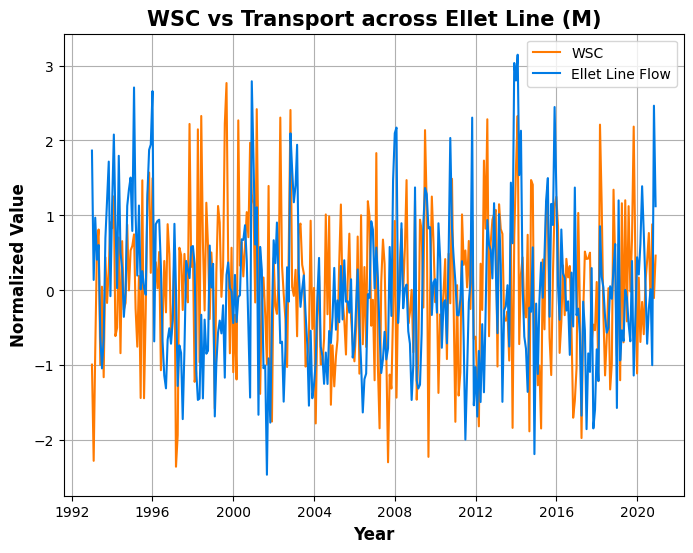

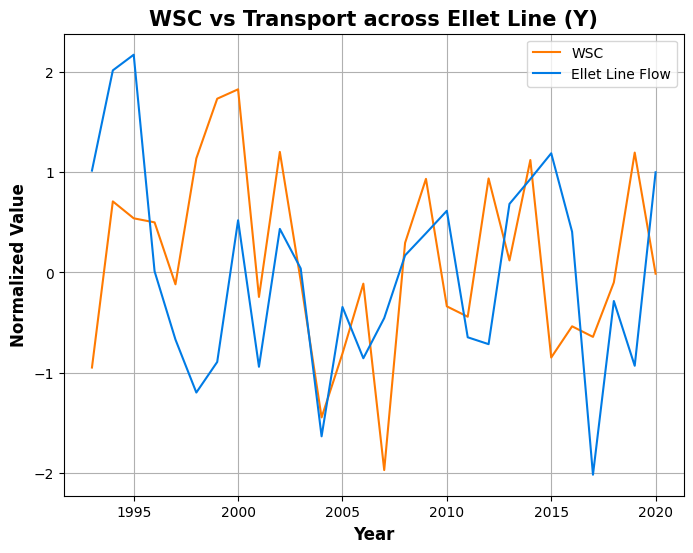

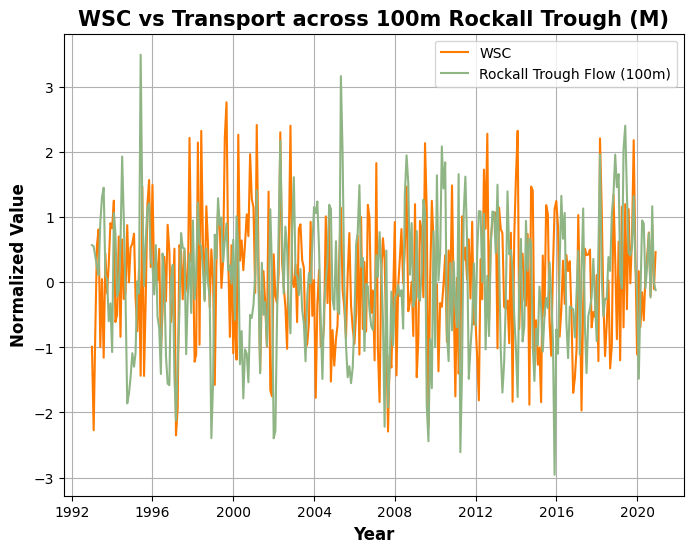

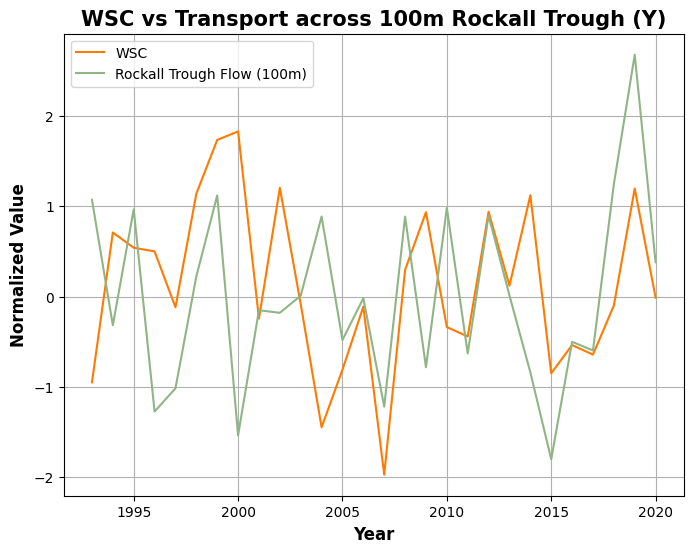

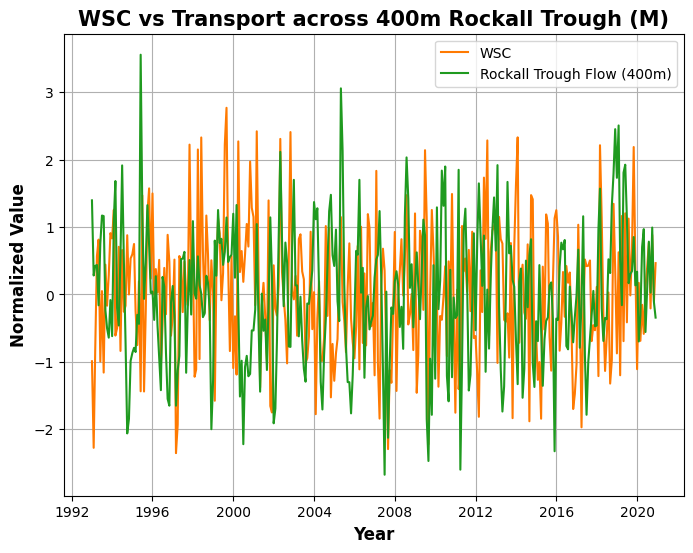

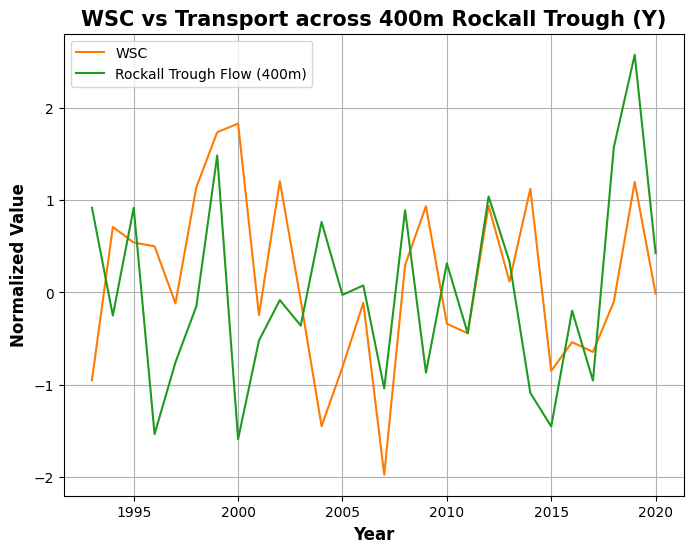

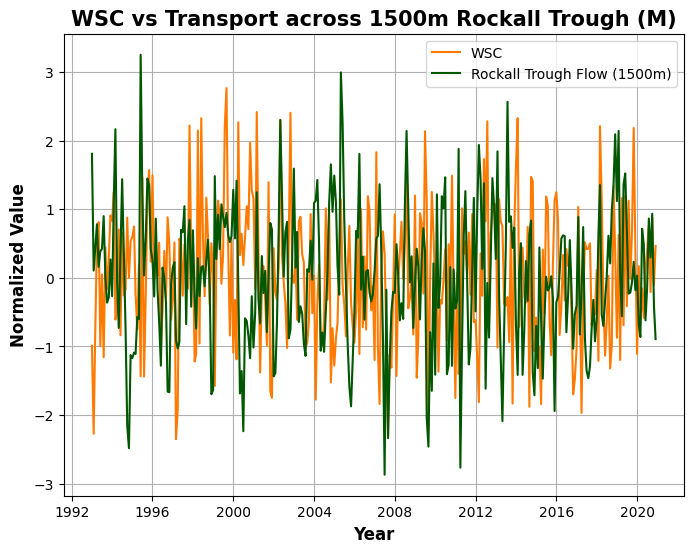

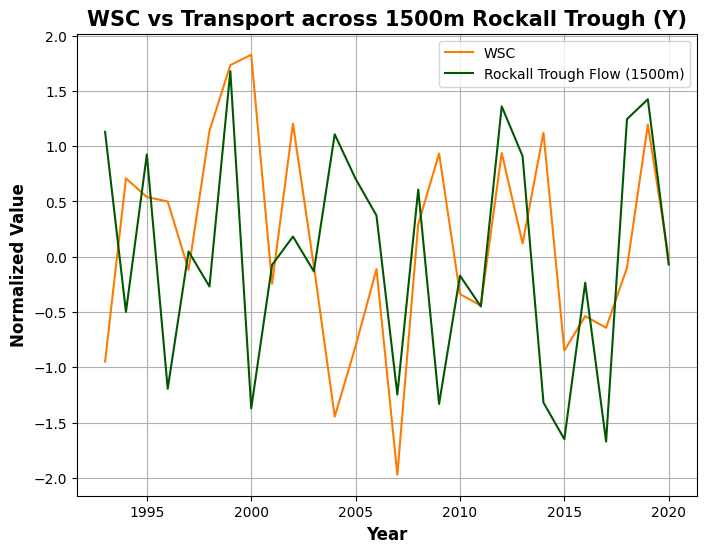

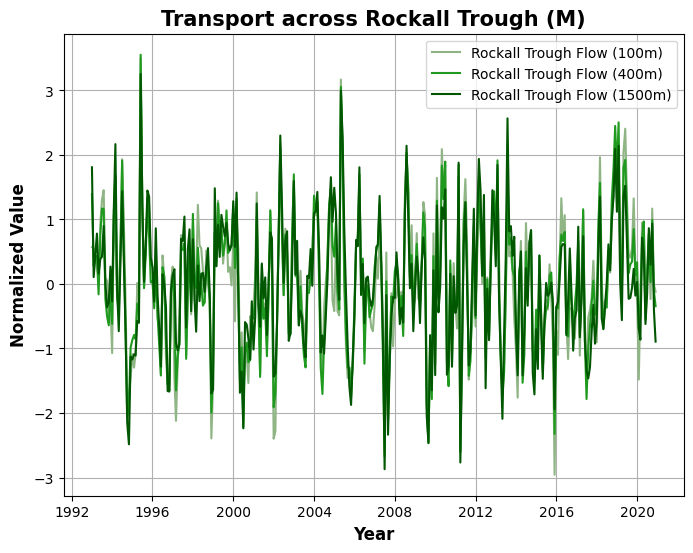

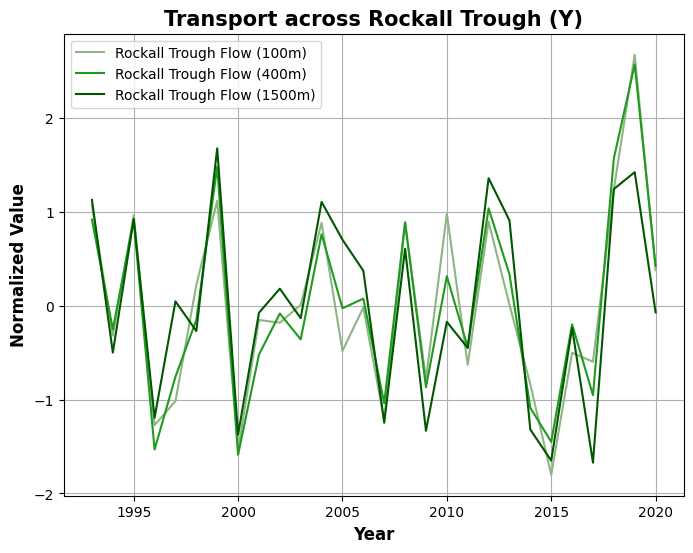

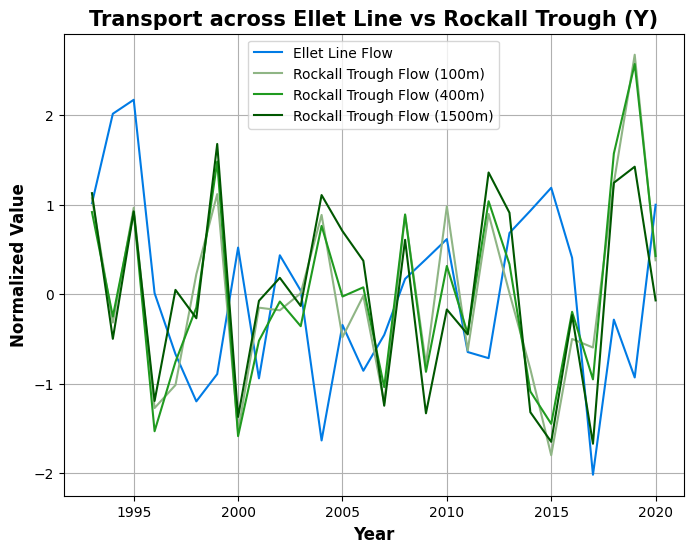

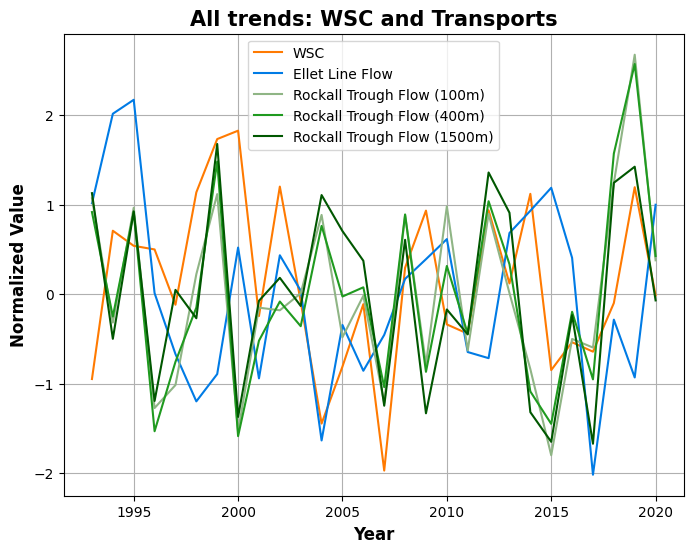

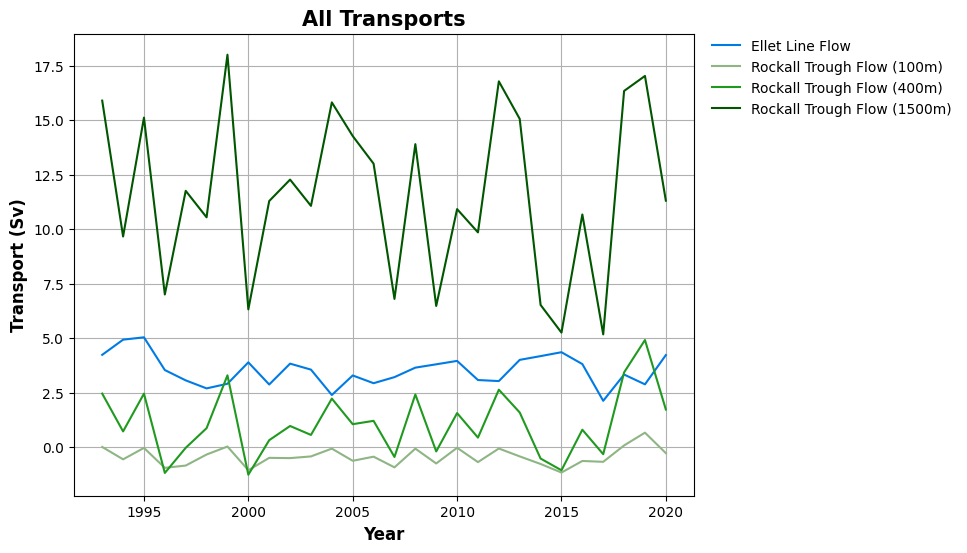

In [6]:
# Monthly Data Plot (Ellet Line vs WSC)
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_monthly[(df_monthly['year']>=1993)], x = 'date', y ='wsc_norm', color=cp['wsc'], label=label_wsc)
sns.lineplot(data = df_monthly[(df_monthly['year']>=1993)], x = 'date', y ='flow_norm', color=cp['el'], label=label_ellet_flow)
plt.title(title_wsc_vs_ellet_m, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()

# Yearly Data Plot (Ellet Line vs WSC)
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_yearly[(df_yearly['year']>=1993)], x = 'year', y ='wsc_norm', color=cp['wsc'], label=label_wsc)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm', color=cp['el'], label=label_ellet_flow)
plt.title(title_wsc_vs_ellet_y, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.grid()
plt.legend()
plt.show()

# Monthly Data Plot (Rockall Trough 100m vs WSC)
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_monthly[(df_monthly['year']>=1993)], x = 'date', y ='wsc_norm', color=cp['wsc'], label=label_wsc)
sns.lineplot(data = df_monthly, x = 'date', y ='flow_norm_nl100', color=cp['nl100'], label=label_rockall_100m)
plt.title(title_wsc_vs_rockall_100m_m, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()

# Yearly Data Plot (Rockall Trough 100m vs WSC)
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_yearly[(df_yearly['year']>=1993)], x = 'year', y ='wsc_norm', color=cp['wsc'], label=label_wsc)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl100', color=cp['nl100'], label=label_rockall_100m)
plt.title(title_wsc_vs_rockall_100m_y, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()

# Monthly Data Plot (Rockall Trough 400m vs WSC)
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_monthly[(df_monthly['year']>=1993)], x = 'date', y ='wsc_norm', color=cp['wsc'], label=label_wsc)
sns.lineplot(data = df_monthly, x = 'date', y ='flow_norm_nl400', color=cp['nl400'], label=label_rockall_400m)
plt.title(title_wsc_vs_rockall_400m_m, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()

# Yearly Data Plot (Rockall Trough 400m vs WSC)
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_yearly[(df_yearly['year']>=1993)], x = 'year', y ='wsc_norm', color=cp['wsc'], label=label_wsc)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl400', color=cp['nl400'], label=label_rockall_400m)
plt.title(title_wsc_vs_rockall_400m_y, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()

# Monthly Data Plot (Rockall Trough 1500m vs WSC)
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_monthly[(df_monthly['year']>=1993)], x = 'date', y ='wsc_norm', color=cp['wsc'], label=label_wsc)
sns.lineplot(data = df_monthly, x = 'date', y ='flow_norm_nl1500', color=cp['nl1500'], label=label_rockall_1500m)
plt.title(title_wsc_vs_rockall_1500m_m, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()

# Yearly Data Plot (Rockall Trough 1500m vs WSC)
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_yearly[(df_yearly['year']>=1993)], x = 'year', y ='wsc_norm', color=cp['wsc'], label=label_wsc)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl1500', color=cp['nl1500'], label=label_rockall_1500m)
plt.title(title_wsc_vs_rockall_1500m_y, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()

# Monthly Transport across Rockall Trough
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_monthly, x = 'date', y ='flow_norm_nl100', color=cp['nl100'], label=label_rockall_100m)
sns.lineplot(data = df_monthly, x = 'date', y ='flow_norm_nl400', color=cp['nl400'], label=label_rockall_400m)
sns.lineplot(data = df_monthly, x = 'date', y ='flow_norm_nl1500', color=cp['nl1500'], label=label_rockall_1500m)
plt.title(title_rockall_tough_transport_m, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()

# Yearly Transport across Rockall Trough
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl100', color=cp['nl100'], label=label_rockall_100m)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl400', color=cp['nl400'], label=label_rockall_400m)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl1500', color=cp['nl1500'], label=label_rockall_1500m)
plt.title(title_rockall_tough_transport_y, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()

# Comparison Plot of Transport across Ellet Line vs Rockall Trough
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm', color=cp['el'], label=label_ellet_flow)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl100', color=cp['nl100'], label=label_rockall_100m)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl400', color=cp['nl400'], label=label_rockall_400m)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl1500', color=cp['nl1500'], label=label_rockall_1500m)
plt.title(title_transport_comparison, weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()


# All trends
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_yearly[(df_yearly['year']>=1993)], x = 'year', y ='wsc_norm', color=cp['wsc'], label=label_wsc)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm', color=cp['el'], label=label_ellet_flow)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl100', color=cp['nl100'], label=label_rockall_100m)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl400', color=cp['nl400'], label=label_rockall_400m)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_norm_nl1500', color=cp['nl1500'], label=label_rockall_1500m)
plt.title('All trends: WSC and Transports', weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel(ylabel_normalized_value, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend()
plt.grid()
plt.show()


# All trends
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = df_yearly, x = 'year', y ='flow', color=cp['el'], label=label_ellet_flow)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_nl100', color=cp['nl100'], label=label_rockall_100m)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_nl400', color=cp['nl400'], label=label_rockall_400m)
sns.lineplot(data = df_yearly, x = 'year', y ='flow_nl1500', color=cp['nl1500'], label=label_rockall_1500m)
plt.title('All Transports', weight=plot_title_fontweight, fontsize=plot_fontsize_title)
plt.ylabel('Transport (Sv)', weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.xlabel(xlabel_year, weight=plot_title_fontweight, fontsize=plot_fontsize_label)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, frameon=False)
plt.grid()
plt.show()

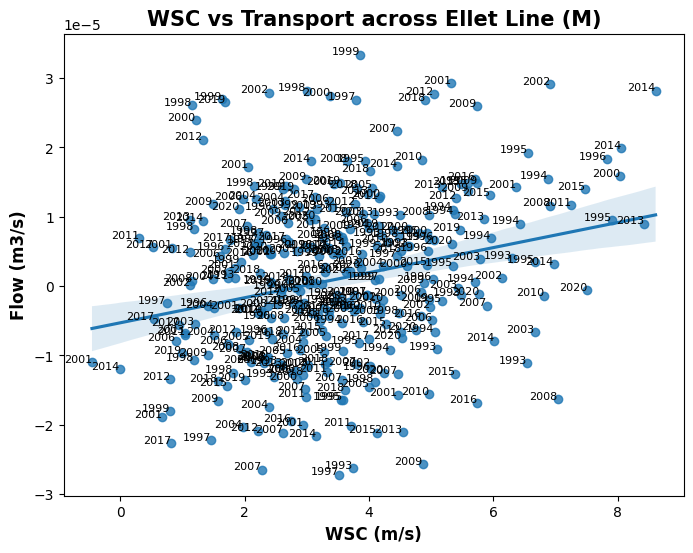

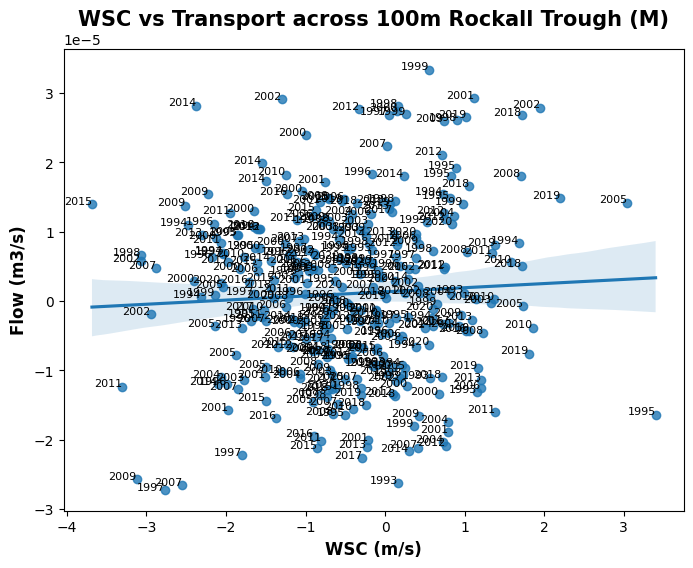

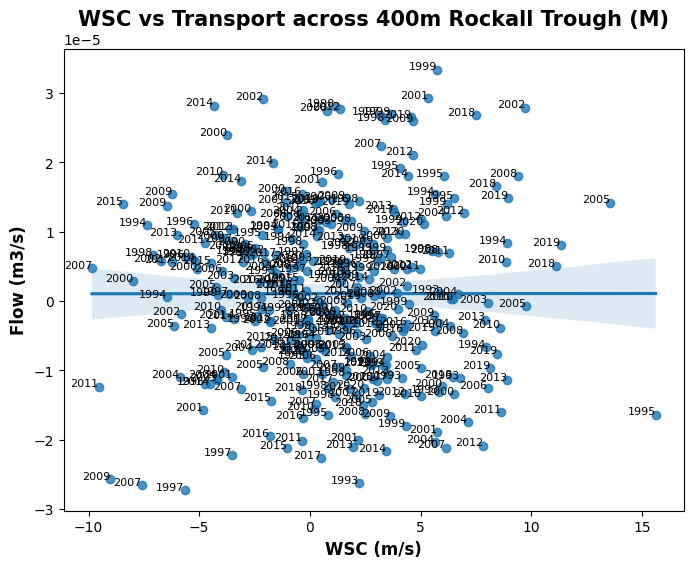

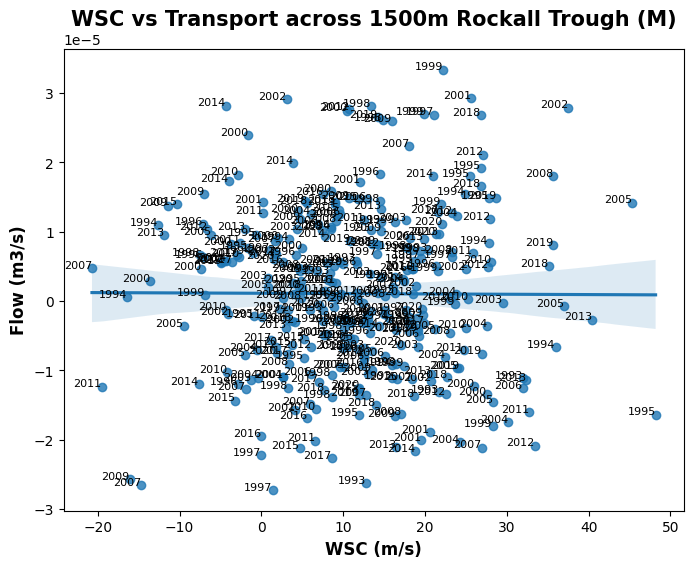

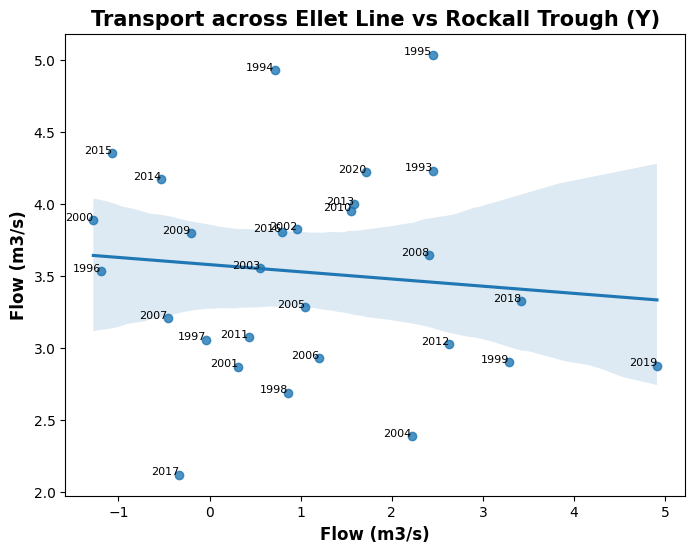

In [7]:
# fig = plt.figure(figsize = (8, 6))
# sns.regplot(data = df_monthly[(df_monthly['year']>=1993) & (df_monthly['year']<=2020)], x ='flow_norm', y = 'wsc_norm')
# plt.title(title_wsc_vs_ellet_m, weight='bold', fontsize = plot_fontsize_title)
# plt.ylabel(label_normalized_flow, weight='bold', fontsize = plot_fontsize_label)
# plt.xlabel(label_normalized_wsc, weight='bold', fontsize = plot_fontsize_label)
# # Add year label for each point
# for i in range(df_monthly.shape[0]):
#     x_val = df_monthly['wsc_norm'].iloc[i]
#     y_val = df_monthly['flow_norm'].iloc[i]
#     if np.isfinite(x_val) and np.isfinite(y_val):  # Check if x and y are finite
#         plt.text(x_val, y_val, str(df_monthly['year'].iloc[i]), fontsize=8, color='black', ha='right')

# plt.show()

fig = plt.figure(figsize = (8, 6))
sns.regplot(data = df_monthly[(df_monthly['year']>=1993) & (df_monthly['year']<=2020)], y = 'wsc', x ='flow')
plt.title(title_wsc_vs_ellet_m, weight='bold', fontsize = plot_fontsize_title)
plt.xlabel('WSC (m/s)', weight='bold', fontsize = plot_fontsize_label)
plt.ylabel('Flow (m3/s)', weight='bold', fontsize = plot_fontsize_label)
# Add year label for each point
for i in range(df_monthly.shape[0]):
    y_val = df_monthly['wsc'].iloc[i]
    x_val = df_monthly['flow'].iloc[i]
    if np.isfinite(x_val) and np.isfinite(y_val):  # Check if x and y are finite
        plt.text(x_val, y_val, str(df_monthly['year'].iloc[i]), fontsize=8, color='black', ha='right')

plt.show()

fig = plt.figure(figsize = (8, 6))
sns.regplot(data = df_monthly[(df_monthly['year']>=1993) & (df_monthly['year']<=2020)], y = 'wsc', x ='flow_nl100')
plt.title(title_wsc_vs_rockall_100m_m, weight='bold', fontsize = plot_fontsize_title)
plt.xlabel('WSC (m/s)', weight='bold', fontsize = plot_fontsize_label)
plt.ylabel('Flow (m3/s)', weight='bold', fontsize = plot_fontsize_label)
# Add year label for each point
for i in range(df_monthly.shape[0]):
    y_val = df_monthly['wsc'].iloc[i]
    x_val = df_monthly['flow_nl100'].iloc[i]
    if np.isfinite(x_val) and np.isfinite(y_val):  # Check if x and y are finite
        plt.text(x_val, y_val, str(df_monthly['year'].iloc[i]), fontsize=8, color='black', ha='right')

plt.show()

fig = plt.figure(figsize = (8, 6))
sns.regplot(data = df_monthly[(df_monthly['year']>=1993) & (df_monthly['year']<=2020)], y = 'wsc', x ='flow_nl400')
plt.title(title_wsc_vs_rockall_400m_m, weight='bold', fontsize = plot_fontsize_title)
plt.xlabel('WSC (m/s)', weight='bold', fontsize = plot_fontsize_label)
plt.ylabel('Flow (m3/s)', weight='bold', fontsize = plot_fontsize_label)
# Add year label for each point
for i in range(df_monthly.shape[0]):
    y_val = df_monthly['wsc'].iloc[i]
    x_val = df_monthly['flow_nl400'].iloc[i]
    if np.isfinite(x_val) and np.isfinite(y_val):  # Check if x and y are finite
        plt.text(x_val, y_val, str(df_monthly['year'].iloc[i]), fontsize=8, color='black', ha='right')

plt.show()

fig = plt.figure(figsize = (8, 6))
sns.regplot(data = df_monthly[(df_monthly['year']>=1993) & (df_monthly['year']<=2020)], y = 'wsc', x ='flow_nl1500')
plt.title(title_wsc_vs_rockall_1500m_m, weight='bold', fontsize = plot_fontsize_title)
plt.xlabel('WSC (m/s)', weight='bold', fontsize = plot_fontsize_label)
plt.ylabel('Flow (m3/s)', weight='bold', fontsize = plot_fontsize_label)
# Add year label for each point
for i in range(df_monthly.shape[0]):
    y_val = df_monthly['wsc'].iloc[i]
    x_val = df_monthly['flow_nl1500'].iloc[i]
    if np.isfinite(x_val) and np.isfinite(y_val):  # Check if x and y are finite
        plt.text(x_val, y_val, str(df_monthly['year'].iloc[i]), fontsize=8, color='black', ha='right')

plt.show()

fig = plt.figure(figsize = (8, 6))
sns.regplot(data = df_yearly[(df_yearly['year']>=1993) & (df_yearly['year']<=2020)], y = 'flow', x ='flow_nl400')
plt.title(title_transport_comparison, weight='bold', fontsize = plot_fontsize_title)
plt.xlabel('Flow (m3/s)', weight='bold', fontsize = plot_fontsize_label)
plt.ylabel('Flow (m3/s)', weight='bold', fontsize = plot_fontsize_label)
# Add year label for each point
for i in range(df_yearly.shape[0]):
    y_val = df_yearly['flow'].iloc[i]
    x_val = df_yearly['flow_nl400'].iloc[i]
    if np.isfinite(x_val) and np.isfinite(y_val):  # Check if x and y are finite
        plt.text(x_val, y_val, str(df_yearly['year'].iloc[i]), fontsize=8, color='black', ha='right')

plt.show()

Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not: if mean, variance and autocovariance remain stable over time.

In [8]:
# Define the ADF test function
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    result = pd.Series(dftest[0:4], index=['Test Statistic','P-value','Lags Used','No of Observations'])
    for key, value in dftest[4].items():
        result['Critical Value (%s)' % key] = value
    return result

adf_table_m = df_monthly[(df_monthly['year']>1993)][['wsc_norm', 'flow_norm', 'flow_norm_nl100', 'flow_norm_nl400', 'flow_norm_nl1500', 
                                                     'wsc', 'flow', 'flow_nl100', 'flow_nl400', 'flow_nl1500']]
adf_results_m = adf_table_m.apply(adf_test, axis=0)

adf_table_y = df_yearly[(df_yearly['year']>1993)][['wsc_norm', 'flow_norm', 'flow_norm_nl100', 'flow_norm_nl400', 'flow_norm_nl1500', 
                                                   'wsc', 'flow', 'flow_nl100', 'flow_nl400', 'flow_nl1500']]
adf_results_y = adf_table_y.apply(adf_test, axis=0)

adf_results_combined = pd.concat([adf_results_m.add_prefix('Monthly_'), adf_results_y.add_prefix('Yearly_')], axis=1)
print(adf_results_combined)

                      Monthly_wsc_norm  Monthly_flow_norm  \
Test Statistic           -1.677995e+01      -7.835989e+00   
P-value                   1.266611e-29       6.113389e-12   
Lags Used                 0.000000e+00       1.000000e+00   
No of Observations        3.230000e+02       3.220000e+02   
Critical Value (1%)      -3.450759e+00      -3.450823e+00   
Critical Value (5%)      -2.870530e+00      -2.870558e+00   
Critical Value (10%)     -2.571560e+00      -2.571575e+00   

                      Monthly_flow_norm_nl100  Monthly_flow_norm_nl400  \
Test Statistic                  -1.067803e+01            -1.052621e+01   
P-value                          4.006803e-19             9.402960e-19   
Lags Used                        1.000000e+00             1.000000e+00   
No of Observations               3.220000e+02             3.220000e+02   
Critical Value (1%)             -3.450823e+00            -3.450823e+00   
Critical Value (5%)             -2.870558e+00            -2.870558e

In [13]:
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    # c = signal.correlate(p,q,'full')
    return c



def ccf_plot(lags, ccf, title, color_key, len):
    fig, ax = plt.subplots(figsize=(9, 6))

    # Set gridlines (major and minor)
    ax.set_axisbelow(True)
    ax.grid(which='major', linestyle='-', linewidth=0.5, color='lightgray')  # Major gridlines
    ax.minorticks_on()  # Enable minor ticks
    ax.grid(which='minor', linestyle=':', linewidth=0.5, color='lightgray')  # Minor gridlines
    
    ax.bar(lags, ccf, width=0.5, color=cp[color_key])  # Use color from the cp dictionary
    
    # Calculate confidence interval based on the positive lag window
    confidence_interval = 2 / np.sqrt(len)
    ax.axhline(-confidence_interval, color='red', lw=1, linestyle='--', label='5% confidence interval')
    ax.axhline(confidence_interval, color='red', lw=1, linestyle='--')
    
    # Remove the vertical line at x=0 (commented out below)
    # ax.axvline(x=0, color='black', lw=1)  
    
    ax.axhline(y=0, color='black', lw=0.7)  # Zero correlation line
    
    # Set axis limits
    ax.set(ylim=[np.min(ccf) - 0.005, np.max(ccf) + 0.005])  # Set y-axis limits
    ax.set(xlim=[-0.5, 12.5])  # Set x-axis limits (optional to adjust as needed)
    
    # Set titles and labels
    ax.set_title(title, weight='bold', fontsize=15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize=12)
    ax.set_xlabel('Lag (Months)', weight='bold', fontsize=12)
    
    plt.legend()
    plt.show()




In [14]:
df_monthly

,date,month,year,wsc,wsc_norm,flow,flow_norm,flow_nl100,flow_norm_nl100,flow_nl400,flow_norm_nl400,flow_nl1500,flow_norm_nl1500
0,1948-01-01,1,1948,1.571623e-05,1.274265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1948-02-01,2,1948,-2.349156e-06,-0.252198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1948-03-01,3,1948,-1.200629e-05,-1.068192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1948-04-01,4,1948,7.145107e-06,0.550034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1948-05-01,5,1948,-7.451491e-08,-0.059999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2020-08-01,8,2020,9.699584e-06,0.765879,3.137380,-0.238475,0.388726,0.754048,4.286293,0.782588,21.304033,0.864384
872,2020-09-01,9,2020,-1.815734e-06,-0.207126,3.549315,0.016008,-0.695712,-0.233738,1.197411,0.027428,14.926508,0.297523
873,2020-10-01,10,2020,1.107301e-05,0.881928,1.908765,-0.997484,0.843668,1.168443,5.140989,0.991541,22.101552,0.935271
874,2020-11-01,11,2020,-5.733526e-07,-0.102149,7.511922,2.464012,-0.450228,-0.010132,0.612846,-0.115485,7.001774,-0.406861


Max CCF: 0.17458832045990402
Min CCF: -0.11028602597675169


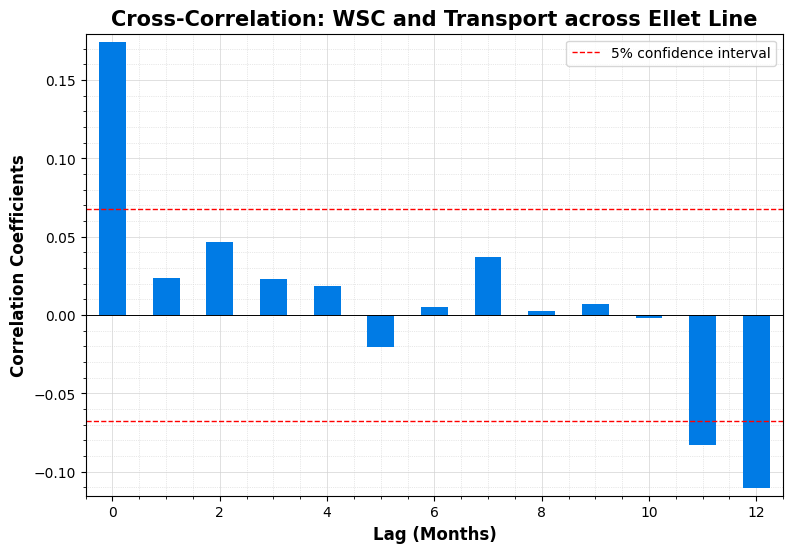

Max CCF: 0.10831843859447232
Min CCF: -0.08744583537998135


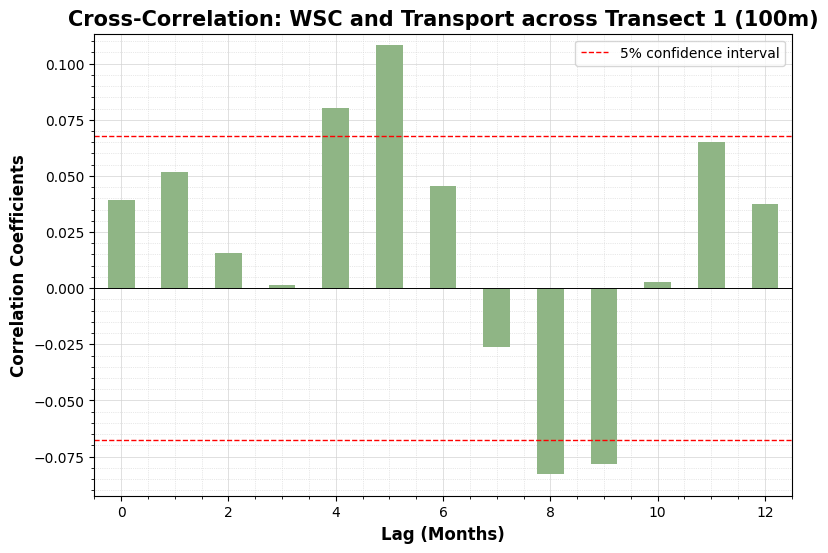

Max CCF: 0.12077425968285019
Min CCF: -0.10438941831011778


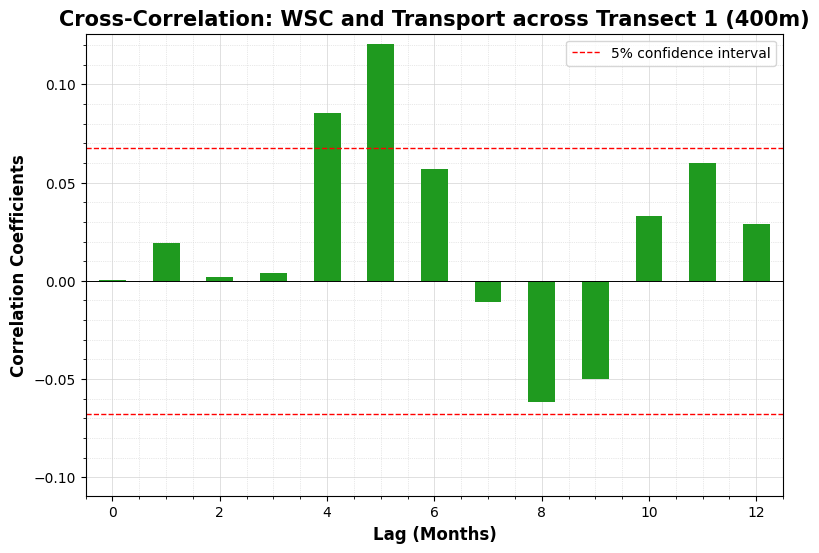

Max CCF: 0.11896729178134068
Min CCF: -0.11568042907284193


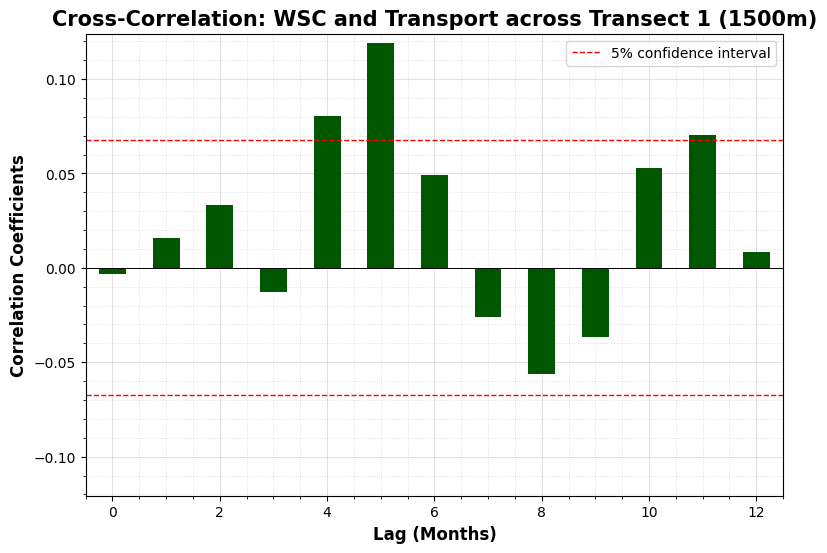

In [15]:
# WSC vs EL
ccf = ccf_values(df_monthly[(df_monthly['year']<=2020) & (df_monthly['year']>=1981)]['wsc'], df_monthly[(df_monthly['year']>=1993)]['flow'])
np.max(ccf), np.min(ccf)

lags = signal.correlation_lags(len(df_monthly[(df_monthly['year']>=1993)]['flow']),
                               len(df_monthly[(df_monthly['year']>=1981) & (df_monthly['year']<=2020)]['wsc']))

# Select only positive lags (i.e., where the flow correlates with past wsc)
# ccf = ccf[lags >= 0]
# lags = lags[lags >= 0]

# Print the max and min of the CCF to understand the range of values
print("Max CCF:", np.max(ccf))
print("Min CCF:", np.min(ccf))

# Plot positive lags
ccf_plot(lags, ccf, 'Cross-Correlation: WSC and Transport across Ellet Line', 'el', len(df_monthly['wsc']))

# WSC vs Rockall 100
ccf = ccf_values(df_monthly[(df_monthly['year']<=2020) & (df_monthly['year']>=1981)]['wsc'], df_monthly[(df_monthly['year']>=1993)]['flow_nl100'])
np.max(ccf), np.min(ccf)

lags = signal.correlation_lags(len(df_monthly[(df_monthly['year']>=1993)]['flow_nl100']),
                               len(df_monthly[(df_monthly['year']>=1981) & (df_monthly['year']<=2020)]['wsc']))

# Select only positive lags (i.e., where the flow correlates with past wsc)
ccf = ccf[lags >= 0]
lags = lags[lags >= 0]

# Print the max and min of the CCF to understand the range of values
print("Max CCF:", np.max(ccf))
print("Min CCF:", np.min(ccf))

# Plot positive lags
ccf_plot(lags, ccf, 'Cross-Correlation: WSC and Transport across Transect 1 (100m)', 'nl100', len(df_monthly['wsc']))


# WSC vs Rockall 400
ccf = ccf_values(df_monthly[(df_monthly['year']<=2020) & (df_monthly['year']>=1981)]['wsc'], df_monthly[(df_monthly['year']>=1993)]['flow_nl400'])
np.max(ccf), np.min(ccf)

lags = signal.correlation_lags(len(df_monthly[(df_monthly['year']>=1993)]['flow_nl400']),
                               len(df_monthly[(df_monthly['year']>=1981) & (df_monthly['year']<=2020)]['wsc']))

# Select only positive lags (i.e., where the flow correlates with past wsc)
ccf = ccf[lags >= 0]
lags = lags[lags >= 0]

# Print the max and min of the CCF to understand the range of values
print("Max CCF:", np.max(ccf))
print("Min CCF:", np.min(ccf))

# Plot positive lags
ccf_plot(lags, ccf, 'Cross-Correlation: WSC and Transport across Transect 1 (400m)', 'nl400', len(df_monthly['wsc']))

# WSC vs Rockall 100
ccf = ccf_values(df_monthly[(df_monthly['year']<=2020) & (df_monthly['year']>=1981)]['wsc'], df_monthly[(df_monthly['year']>=1993)]['flow_nl1500'])
np.max(ccf), np.min(ccf)

lags = signal.correlation_lags(len(df_monthly[(df_monthly['year']>=1993)]['flow_nl1500']),
                               len(df_monthly[(df_monthly['year']>=1981) & (df_monthly['year']<=2020)]['wsc']))

# Select only positive lags (i.e., where the flow correlates with past wsc)
ccf = ccf[lags >= 0]
lags = lags[lags >= 0]

# Print the max and min of the CCF to understand the range of values
print("Max CCF:", np.max(ccf))
print("Min CCF:", np.min(ccf))

# Plot positive lags
ccf_plot(lags, ccf, 'Cross-Correlation: WSC and Transport across Transect 1 (1500m)', 'nl1500', len(df_monthly['wsc']))

In [12]:
# WSC vs EL
ccf = ccf_values(df_monthly[(df_monthly['year']>=1993)]['flow_norm'], df_monthly[(df_monthly['year']>=1993)]['flow_norm_nl100'])
np.max(ccf), np.min(ccf)

lags = signal.correlation_lags(len(df_monthly[(df_monthly['year']>=1993)]['flow_norm']),
                               len(df_monthly[(df_monthly['year']>=1993)]['flow_norm_nl100']))

# Select only positive lags (i.e., where the flow correlates with past wsc)
ccf = ccf[lags >= 0]
lags = lags[lags >= 0]

# Print the max and min of the CCF to understand the range of values
print("Max CCF:", np.max(ccf))
print("Min CCF:", np.min(ccf))

# Plot positive lags
ccf_plot(lags, ccf, 'Cross-Correlation: Transport across Ellet Line and Transport accross T1')

# WSC vs Rockall 100
ccf = ccf_values(df_monthly[(df_monthly['year']>=1993)]['flow_norm'], df_monthly[(df_monthly['year']>=1993)]['flow_norm_nl100'])
np.max(ccf), np.min(ccf)

lags = signal.correlation_lags(len(df_monthly[(df_monthly['year']>=1993)]['flow_norm_nl100']),
                               len(df_monthly[(df_monthly['year']>=1981) & (df_monthly['year']<=2020)]['wsc_norm']))

# Select only positive lags (i.e., where the flow correlates with past wsc)
ccf = ccf[lags >= 0]
lags = lags[lags >= 0]

# Print the max and min of the CCF to understand the range of values
print("Max CCF:", np.max(ccf))
print("Min CCF:", np.min(ccf))

# Plot positive lags
ccf_plot(lags, ccf, 'Cross-Correlation: WSC and Transport across Transect 1 (100m)')


# WSC vs Rockall 400
ccf = ccf_values(df_monthly[(df_monthly['year']<=2020) & (df_monthly['year']>=1981)]['wsc_norm'], df_monthly[(df_monthly['year']>=1993)]['flow_norm_nl400'])
np.max(ccf), np.min(ccf)

lags = signal.correlation_lags(len(df_monthly[(df_monthly['year']>=1993)]['flow_norm_nl400']),
                               len(df_monthly[(df_monthly['year']>=1981) & (df_monthly['year']<=2020)]['wsc_norm']))

# Select only positive lags (i.e., where the flow correlates with past wsc)
ccf = ccf[lags >= 0]
lags = lags[lags >= 0]

# Print the max and min of the CCF to understand the range of values
print("Max CCF:", np.max(ccf))
print("Min CCF:", np.min(ccf))

# Plot positive lags
ccf_plot(lags, ccf, 'Cross-Correlation: WSC and Transport across Transect 1 (400m)')

# WSC vs Rockall 100
ccf = ccf_values(df_monthly[(df_monthly['year']<=2020) & (df_monthly['year']>=1981)]['wsc_norm'], df_monthly[(df_monthly['year']>=1993)]['flow_norm_nl1500'])
np.max(ccf), np.min(ccf)

lags = signal.correlation_lags(len(df_monthly[(df_monthly['year']>=1993)]['flow_norm_nl1500']),
                               len(df_monthly[(df_monthly['year']>=1981) & (df_monthly['year']<=2020)]['wsc_norm']))

# Select only positive lags (i.e., where the flow correlates with past wsc)
ccf = ccf[lags >= 0]
lags = lags[lags >= 0]

# Print the max and min of the CCF to understand the range of values
print("Max CCF:", np.max(ccf))
print("Min CCF:", np.min(ccf))

# Plot positive lags
ccf_plot(lags, ccf, 'Cross-Correlation: WSC and Transport across Transect 1 (1500m)')

Max CCF: 0.13302097667053167
Min CCF: -0.18063412164758264


TypeError: ccf_plot() missing 2 required positional arguments: 'color_key' and 'len'